In [3]:
import dask.dataframe as dd
import os

# Part 1: Initial EDA on Raw Unprocessed Data

In [14]:
#Directories
answers_dir = os.path.join( "..", "data", "raw_external", 'answers')
r52_dir = os.path.join( "..", "data", "raw_external", 'r52')

# Define the file paths relative to the answers_dir
insiders_file_path = os.path.join(answers_dir, 'insiders.csv')
# Define the file paths relative to the r52_dir
file_file_path = os.path.join(r52_dir, 'file.csv')
http_file_path = os.path.join(r52_dir, 'http.csv')
psychometric_file_path = os.path.join(r52_dir, 'psychometric.csv')
device_file_path = os.path.join(r52_dir, 'device.csv')
logon_file_path = os.path.join(r52_dir, 'logon.csv')
email_file_path = os.path.join(r52_dir, 'email.csv')

# Absolute Paths
print("Insiders File Path:", insiders_file_path)
print("File File Path:", file_file_path)
print("HTTP File Path:", http_file_path)
print("Psychometric File Path:", psychometric_file_path)
print("Device File Path:", device_file_path)
print("Logon File Path:", logon_file_path)
print("Email File Path:", email_file_path)


Insiders File Path: ..\data\raw_external\answers\insiders.csv
File File Path: ..\data\raw_external\r52\file.csv
HTTP File Path: ..\data\raw_external\r52\http.csv
Psychometric File Path: ..\data\raw_external\r52\psychometric.csv
Device File Path: ..\data\raw_external\r52\device.csv
Logon File Path: ..\data\raw_external\r52\logon.csv
Email File Path: ..\data\raw_external\r52\email.csv


# EDA on answers folder 
- The 'answers' folder contains information on all malicious users in the datasets.
- The dataset
consists of multiple releases, each of which characterizes an
organization with 1000 to 4000 employees. 

In [5]:
answers = dd.read_csv(insiders_file_path)
answers.compute()

,dataset,scenario,details,user,start,end
0,2.0,1,r2.csv,ONS0995,3/6/2010 1:41:56,3/20/2010 8:10:12
1,3.1,1,r3.1-1.csv,CSF0929,07/01/2010 01:24:58,07/16/2010 06:52:00
2,3.1,2,r3.1-2.csv,CCH0959,08/02/2010 10:34:31,09/30/2010 15:04:03
3,3.2,1,r3.2-1.csv,RCW0822,09/29/2010 21:10:27,10/15/2010 06:34:52
4,3.2,2,r3.2-2.csv,JCE0258,07/12/2010 08:16:02,09/03/2010 16:16:29
...,...,...,...,...,...,...
186,6.2,1,r6.2-1.csv,ACM2278,8/18/2010 21:47:42,08/24/2010 03:48:51
187,6.2,2,r6.2-2.csv,CMP2946,02/07/2011 12:28:06,03/04/2011 12:30:25
188,6.2,3,r6.2-3.csv,PLJ1771,8/12/2010 08:09:00,08/12/2010 16:11:39
189,6.2,4,r6.2-4.csv,CDE1846,/21/2011 11:43:39,04/25/2011 17:55:00


- There is one detailed observables file per incident. 
- These files are
*not* proper CSV because the rows are variable-length. 
- The data types
are interleaved in chronological order with an additional first column
indicating the data type of the current row.

Now lets look at the detailed distribution of malicious users in each scenario per dataset.

In [6]:
scenario_counts = answers.groupby('dataset')['scenario'].value_counts()
print(scenario_counts.compute())

dataset  scenario
2.0      1            1
3.1      1            1
         2            1
3.2      1            1
         2            1
4.1      1            1
         2            1
         3            1
4.2      1           30
         2           30
         3           10
5.1      1            1
         2            1
         3            1
         4            1
5.2      1           29
         2           30
         3           10
         4           30
6.1      1            1
         2            1
         3            1
         4            1
         5            1
6.2      1            1
         2            1
         3            1
         4            1
         5            1
Name: count, dtype: int64


Picking a dataset to work with:

- Most datasets had one instance of each scenario, for the scenarios
that existed at the time that dataset was created. 

- Release 5.2 of
the dataset (CERT r5.2) employed in this work simulates
an organization with 2000 employees over the period of 18
months. 

- It was a
"dense needle" dataset and had many instances of each scenario. Each malicious insider in CERT r5.2 belongs to
one of four popular insider threat scenarios: data exfiltration
(scenario 1), intellectual property theft (scenarios 2, 4) to IT
sabotage (scenario 3). 

- It also had instances of 4 scenarios making it the most diverse dataset 
with sufficient datapoints. Hence, our group chose to select 5.2 for our analysis. 

In [7]:
filtered_df = answers[answers['dataset'].isin([5.2])]
filtered_df.compute()

fraudulent_users = filtered_df["user"].unique() 
fraudulent_users.compute()

0     ALT1465
1     ALW0764
2     AYG1697
3     DAS1320
4     DNJ0740
       ...   
94    OFS0030
95    OHS0036
96    RCG0584
97    WCW1013
98    WOS1834
Name: user, Length: 99, dtype: object

# Dataset 5.2

CERT r5.2 consists of user activity logs, categorized as follows: login/logoff, email, web, file and thumb
drive connect, as well as organizational structure and user
information. 

In [8]:
httpfile = dd.read_csv(http_file_path)
httpfile.head()

,id,date,user,pc,url,content
0,{D8Q7-C0RU46YI-7391WHNI},01/02/2010 06:46:20,HMI1448,PC-9352,http://nymag.com/Eagle_comic/hultons/objyvatun...,eleven 1963 greater literature shorbodolio fun...
1,{N4G0-D6NC43RD-2373QXNK},01/02/2010 06:47:25,HMI1448,PC-9352,http://nymag.com/Terra_Nova_Expedition/koettli...,victims successor land restrictions provided a...
2,{R3P9-N8JS44BS-7489ITZI},01/02/2010 06:48:43,HMI1448,PC-9352,http://verizonwireless.com/True_at_First_Light...,single fort jurisdiction motion 1951 camp dama...
3,{P4N2-M6RQ31CW-4212PATG},01/02/2010 06:49:14,KMC1934,PC-2683,http://americanexpress.com/Hurricane_John_1994...,grow severe manner open length detect sharp li...
4,{H1B6-X2LV32DD-6280NRJN},01/02/2010 06:49:58,KMC1934,PC-2683,http://buzzfeed.com/ROT13/rot47/uvxvatrgvdhrgg...,ever travelling second served air later planne...


http.csv
* Fields: id, date, user, pc, url, content
* Has modular/community structure, but is not correlated with social/email graph.
* Domain names have been expanded to full URLs with paths.
* Words in the URL are usually related to the topic of the web page.
* Content consists of a space-separated list of content keywords.
* Each web page can contain multiple topics.
* WARNING: Most of the domain names are randomly generated, so some may point to malicious websites. Please exercise caution if visiting any of them.


In [9]:
file = dd.read_csv(file_file_path)
file.head()

,id,date,user,pc,filename,activity,to_removable_media,from_removable_media,content
0,{Y1W9-R7VJ77IC-9445QFNQ},01/02/2010 08:15:10,TSG0262,PC-9993,R:\79L99n6\H7RHJS5J.zip,File Open,False,True,50-4B-03-04-14 moved imaging underwent key lat...
1,{Y3U8-G5BL42LO-9404XAHI},01/02/2010 08:16:01,TSG0262,PC-9993,R:\79L99n6\H7RHJS5J.zip,File Open,False,True,50-4B-03-04-14 moved imaging underwent key lat...
2,{G6O2-V1BA89IL-9551VVVW},01/02/2010 08:16:18,TSG0262,PC-9993,R:\79L99n6\H7RHJS5J.zip,File Write,True,False,50-4B-03-04-14 visited immigrants plates day f...
3,{C7E2-M2KL43BA-8425WTXD},01/02/2010 08:16:47,TSG0262,PC-9993,R:\61Sj7N2\AIFSE2LN.doc,File Write,True,False,D0-CF-11-E0-A1-B1-1A-E1 increased star lower t...
4,{T5S8-H7KZ29BM-5254RFKH},01/02/2010 08:17:43,TSG0262,PC-9993,R:\79L99n6\H7RHJS5J.zip,File Write,True,False,50-4B-03-04-14 northwest british bay recalled ...


file.csv
Fields: id, date, user, pc, filename, content
* Each entry represents a file copy to a removable media device.
* Content consists of a hexadecimal encoded file header followed by a space-separated list of content keywords
* Each file can contain multiple topics.
* File header correlates with filename extension.
* The file header is the same for all MS Office file types.
* Each user has a normal number of file copies per day. Deviation from normal can be considered a significant indicator.


In [10]:
device = dd.read_csv(device_file_path)
device.compute()

,id,date,user,pc,file_tree,activity
0,{C9S1-Y8GB42VD-2923GATU},01/02/2010 07:27:19,HRE1950,PC-8025,R:\;R:\HRE1950;R:\47yHBn0;R:\54s7J45,Connect
1,{C3G4-U2ON02HC-9088IHGJ},01/02/2010 07:40:51,EMR0269,PC-6370,R:\;R:\EMR0269;R:\753Cf59;R:\18d36D6;R:\89bc6Q2,Connect
2,{X4S2-R2YC60OH-9191YYMD},01/02/2010 07:45:00,EMR0269,PC-6370,NaN,Disconnect
3,{G7C9-E4MQ65OF-8259TKPO},01/02/2010 07:49:50,HRE1950,PC-8025,NaN,Disconnect
4,{J8B1-S3LN49GC-0432LLSY},01/02/2010 07:50:31,BWJ1539,PC-4624,R:\;R:\BWJ1539,Connect
...,...,...,...,...,...,...
836979,{B5U2-T2CM60SI-7033NUBS},06/01/2011 22:14:46,DBS0048,PC-8658,NaN,Disconnect
836980,{B3R3-G5XV35PK-6637LOLJ},06/01/2011 22:46:24,TAW0689,PC-1024,R:\;R:\TAW0689,Connect
836981,{X9N7-S7VZ59EM-0783KWHK},06/01/2011 22:46:27,TAW0689,PC-1024,NaN,Disconnect
836982,{B4L6-A7ZQ77YV-2346ZEBL},06/01/2011 23:45:01,JUW1135,PC-3180,R:\;R:\JUW1135,Connect


device.csv
* Fields: id, date, user, pc, file_tree, activity (connect/disconnect)
* Some users use a thumb drive
* Some connect events may be missing disconnect events, because users can power down machine before removing drive
* Users are assigned a normal/average number of thumb drive uses per day. Deviations from a user's normal usage can be considered significant.
* The file_tree field is a semicolon-delimited list of directories on the device.


- WE DONT USE DEVICE BECAUSE WE CAN SEE THE ACTIVITY FROM FILES)
['id' 'date' 'user' 'pc' 'file_tree' 'activity']
Drop file_tree,content,pc 
File Keeps  --> acitvity == connect

- Interesting column 'content' can be used for nlp 


In [11]:
logon = dd.read_csv(logon_file_path)
logon.head()

,id,date,user,pc,activity
0,{Q4D5-W4HH44UC-5188LWZK},01/02/2010 02:24:51,JBI1134,PC-0168,Logon
1,{G7V0-S4TP95SA-9203AOGR},01/02/2010 02:38:28,JBI1134,PC-0168,Logoff
2,{B4U7-K4DB84LM-2657VBFY},01/02/2010 04:55:52,JBI1134,PC-2320,Logon
3,{K2E1-W7VG04OA-3686THSV},01/02/2010 05:02:28,JBI1134,PC-2320,Logoff
4,{Z7B2-Z8AS75YE-4485NAFE},01/02/2010 06:35:00,HMI1448,PC-9352,Logon


logon.csv
* Fields: id, date, user, pc, activity (Logon/Logoff)
* Weekends and statutory holidays (but not personal vacations) are included as days when fewer people work.
* No user may log onto a machine where another user is already logged on, unless the first user has locked the screen.
* Logoff requires preceding logon
* A small number of daily logons are intentionally not recorded to simulate dirty data.
* Some logons occur after-hours
  - After-hours logins and after-hours thumb drive usage are intended to be significant.
* Logons precede other PC activity
* Screen unlocks are recorded as logons. Screen locks are not recorded.
* Any particular user’s average habits persist day-to-day
  - Start time (+ a small amount of variance)
  - Length of work day (+ a small amount of variance)
  - After-hours work: some users will logon after-hours, most will not
* Some employees leave the organization:  no new logon activity from the default start time on the day of termination
* 2k users, each with an assigned PC
* 100 shared machines used by some of the users in addition to their assigned PC. These are shared in the sense of a computer lab, not in the sense of a Unix server or Windows Terminal Server.
* Systems administrators with global access privileges are identified by job role "ITAdmin".
* Some users log into another user's dedicated machine from time to time.


In [12]:
email = dd.read_csv(email_file_path)
email.head()

,id,date,user,pc,to,cc,bcc,from,activity,size,attachments,content
0,{N9X0-P3SX99UT-3623QQUN},01/02/2010 06:49:35,KMC1934,PC-2683,Harding.Alden.Lester@dtaa.com;Ora.Clementine.L...,Remedios.Kylynn.Weaver@dtaa.com;Hamilton.Palme...,Karina.Melanie.Collins@dtaa.com,Karina.Melanie.Collins@dtaa.com,Send,22578,NaN,lost six speculated individual theoren in onta...
1,{F5G8-U4KL36AB-1579CZGX},01/02/2010 06:50:35,KMC1934,PC-2683,Harding.Alden.Lester@dtaa.com;Ora.Clementine.L...,Remedios.Kylynn.Weaver@dtaa.com;Hamilton.Palme...,NaN,Karina.Melanie.Collins@dtaa.com,Receive,22578,NaN,lost six speculated individual theoren in onta...
2,{U8D2-M5FH65BW-3939CQIC},01/02/2010 06:53:37,KMC1934,PC-2683,Griffith.Xenos.Miles@dtaa.com,Karina.Melanie.Collins@dtaa.com,NaN,Karina.Melanie.Collins@dtaa.com,Send,34569,NaN,examples losing brookside erupted comeback una...
3,{A5X6-X3KN62LU-5816QTBZ},01/02/2010 06:53:46,KMC1934,PC-2683,Mechelle.Nicole.Miles@dtaa.com,NaN,Karina.Melanie.Collins@dtaa.com,Karina.Melanie.Collins@dtaa.com,Send,33953,NaN,coldest slowed 1989 being shootout marketing w...
4,{Q8R5-A2WJ20NG-9108MVZX},01/02/2010 06:54:33,KMC1934,PC-2683,Mechelle.Nicole.Miles@dtaa.com,Karina.Melanie.Collins@dtaa.com,NaN,Karina.Melanie.Collins@dtaa.com,Send,3116485,movie.jpg(330094);postmodern.pdf(1988252);athl...,sixth former speed athlete annual automotive s...



email.csv
* Fields: id, date, user, pc, to, cc, bcc, from, activity, size, attachments, content
* Driven by underlying friendship and organizational graphs.
* Role (from LDAP) drives the amount of email a user sends per day.
* The vast majority of edges (sender/recipient pairs) are exist because the two users are friends.
* A small number of edges are introduced as noise. A small percentage of the time, a user will email someone randomly.
* Emails can have multiple recipients
* Emails can have a mix of employees and non-employees in dist list
* Non employees use a non-DTAA email addresses; employees use a DTAA email address
* Terminated employees remain in the population, and thus are eligible to be contacted as non-employees
* A friendship graph edge is not implied between the multiple recipients of an email.
* Unlike the previous release, we do not believe the observed email graph follows graph power laws
  because the power-law-conforming friendship graph is overwhelmed by the organizational graph.
* Email size and attachment count are not correlated with each other.
* Email size refers to the number of bytes in the message, not including attachments.
* Content consists of a space-separated list of content keywords.
* "Content" does not specifically refer to the subject or body. We have not made that distinction.
* Each message can contain multiple topics.
* Message topics are chosen based on both sender and recipient topic affinities.




In [13]:
psycho = dd.read_csv(psychometric_file_path)
psycho.head()

,employee_name,user_id,O,C,E,A,N
0,Maisie Maggy Kline,MMK1532,17,17,16,22,28
1,Nicole Tanya Burt,NTB0710,46,37,32,22,21
2,Madeline Tatum Donaldson,MTD0971,22,38,17,39,40
3,Nicholas Hamish Browning,NHB1529,41,40,20,44,25
4,Hoyt Berk Wiley,HBW0057,35,33,43,44,29


psychometric.csv
* Fields: employee_name, user_id, O, C, E, A, N
* Big 5 psychometric score
* See http://en.wikipedia.org/wiki/Big_Five_personality_traits for the definitions of O, C, E, A, N ("Big 5").
* Extroversion score drives the number of connections a user has in the friendship graph.
* Conscientiousness score drives late work arrivals.
* This information would be latent in a real deployment, but is offered here in case it is helpful.
* A latent job satisfaction variable drives behaviors including job searching and punctuality.


- Useful for scenario 2 and 3 
- We can use email.csv to plot underlying friendship and organizational graphs. 

### Important note
- Note that the dataframe is extremely big. 
- Takes minutes to load simple functions like  `len(htttpfile)`, or `httpfile.describe()`
even with dask
- We will definitely have to do some form of data processing and feature extraction to collate all these files for model training

# Analysis of Files

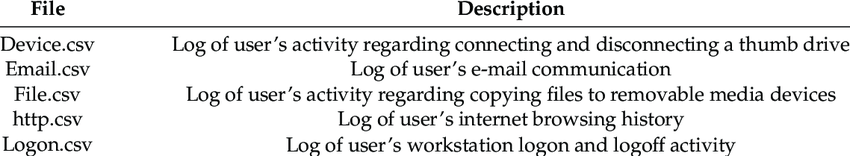

The dataset consists of various features that have been extracted from activity logs and user context models. These features include counts of user actions (frequency features) and descriptive statistics (statistical features), such as mean, median, standard deviation, etc., for different types of data like emails, files, and web activity.

The dataset seems to be divided into multiple sections:

The first section contains identifiers and timestamps (starttime and endtime) along with user, week, and project information.


Following this, there are user-related attributes like role, b_unit, f_unit, dept, team, and ITAdmin, which likely represent their role in the company, business unit, functional unit, department, team, and whether they have IT administrative privileges.


Next, there are columns for personality traits or psychological factors (O, C, E, A, N) which could represent the "Big Five" personality traits (Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism). These might be used to model user behavior or risk profiles.
The subsequent sets of columns are related to various user actions, broken down by time of day and type of action, like n_logon, n_file, and n_email, etc. These could be the number of times a user has performed a specific action, such as logging in, accessing files, or sending emails.
There are also detailed breakdowns of activities within work hours, after hours, and during weekends. This can help in identifying anomalies like unusual after-hours activity which could indicate a security threat.


Finally, the dataset contains columns that indicate the counts and certain statistics related to the use of USB devices, file activities, email communications, and web traffic (http).
This dataset would likely be used in conjunction with machine learning algorithms to detect anomalous behavior that could signify insider threats, as well as to help security analysts make informed decisions about potential risks within the organization. The inclusion of time-based features (like after hours or weekend activity) and specific categorizations of activities (like USB usage or file activities) are likely meant to capture patterns that might be indicative of malicious intent.

Given the detailed nature of the dataset and the various metrics it includes, it seems to be designed to offer a comprehensive view of a user's activity, enabling fine-grained analysis and detection capabilities for cybersecurity purposes.

BREAKDOWN: 

FILES

['id' 'date' 'user' 'pc' 'filename' 'activity' 'to_removable_media'
 'from_removable_media' 'content']
 
HTTP

['id' 'date' 'user' 'pc' 'url' 'content']
 
LOGON 

['id' 'date' 'user' 'pc' 'activity']

EMAIL

['id' 'date' 'user' 'pc' 'to' 'cc' 'bcc' 'from' 'activity' 'size'
 'attachments' 'content']

DEVICE

['id' 'date' 'user' 'pc' 'file_tree' 'activity']

PSYCHO

['employee_name' 'user_id' 'O' 'C' 'E' 'A' 'N']

LDAP

[employee_name,user_id,email,role,projects,business_unit,functional_unit,department,team,supervisor]